# Lab 7: Principal Component Analysis (PCA)

In this lab session we will implement the Principal Component Analysis (PCA) to reduce the dimensionality of the Iris flower dataset.

We will first code this ourselves using NumPy and will then validate our solution comparing our results with Scipy's PCA implementation.

Finally, we will compare the PCA-reduced samples to the reduced samples we obtained by manually selecting two features in lab 5.

As usual, let's import the libraries before we start by running the cell below.

In [2]:
from __future__ import print_function # to avoid issues between Python 2 and 3 printing

import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint
from sklearn.decomposition import PCA

# show matplotlib figures inline
%matplotlib inline

In [3]:
# By default we set figures to be 12"x8" on a 110 dots per inch (DPI) screen 
# (adjust DPI if you have a high res screen!)
plt.rc('figure', figsize=(12, 8), dpi=110)
plt.rc('font', size=12)

## Load the data

In this lab we will use the Iris dataset again. Let's run the cell below to load the data.

In [4]:
# load the iris train and test sets

def load_iris_data(train_path='iris_train.csv', test_path='iris_test.csv'):
    train_set = np.loadtxt(train_path, delimiter=',')
    test_set = np.loadtxt(test_path, delimiter=',')

    # separate labels from features
    train_labels = train_set[:, 4].astype(np.int)
    train_set = train_set[:, 0:4]
    test_labels = test_set[:, 4].astype(np.int)
    test_set = test_set[:, 0:4]
    
    return train_labels, train_set, test_labels, test_set

train_labels, train_set, test_labels, test_set = load_iris_data()

## PCA steps

To implement PCA we will need to implement the following steps __on the training set__ which is represented as a $n \times d$ matrix :

1. Calculate the covariance matrix 
2. Calculate the eigenvectors and the corresponding eigenvalues. 
3. Sort the eigenvectors by decreasing eigenvalues and choose the first $k$ eigenvectors using such order. This is to create a $d \times k$ matrix $W$ that will be used to project the data into a new lower dimensional space.
4. Use the $W$ matrix to transform the samples onto the new space.

## 1. Calculate the covariance matrix

You can use NumPy's function [`np.cov`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html) for this. Pay attention to the `rowvar` argument and make sure your covariance matrix is 4x4.

In [5]:
covariance = np.cov(train_set, rowvar=False)
print(covariance)

[[ 0.72464646 -0.04171717  1.34292929  0.53747475]
 [-0.04171717  0.16303434 -0.27886263 -0.10364848]
 [ 1.34292929 -0.27886263  3.09698889  1.27729495]
 [ 0.53747475 -0.10364848  1.27729495  0.56549091]]


## 2. Calculate eigenvectors and eigenvalues

You can use NumPy's function [`np.linalg.eig`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html?highlight=eig#numpy.linalg.eig) for this

In [6]:
eigen = np.linalg.eig(covariance)
print(eigen)

(array([4.24749901, 0.21005738, 0.07169534, 0.02090887]), array([[ 0.37956727, -0.64272351, -0.57294026,  0.33848876],
       [-0.0710188 , -0.73690217,  0.59691517, -0.30923097],
       [ 0.85220314,  0.18159765,  0.07431063, -0.48502581],
       [ 0.35303659,  0.10442207,  0.55669531,  0.74468217]]))


## 3. Sort the eigenvectors by decreasing eigenvalues

The eigenvalues provide a measure of how much information each eigvenvector carries. By sorting the eigenvectors in descending order according to the respective eigenvalues, we thus sort the various components in decreasing order of importance.

There is no guarantee `np.linalg.eig` returns the eigenvectors in a sorted order, so we need to to sort them before creating the $W$ matrix.

Choose the first $k$ eigenvectors using such order to create the $d \times k$ matrix $W$. Print the sorted eigenvectors and the corresponding eigenvalues to check your code. 

We will use $k=2$, so you should obtain a matrix of shape $4 \times 2$.

__Hint__. There are different ways to achieve this. As a suggestion, our solution used NumPy's functions [`np.flip`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.flip.html) and [`np.argsort`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html).

In [7]:
order = np.flip(np.argsort(eigen[0]))
orderedVec = np.array([ eigen[1][x] for x in order ])
print(orderedVec)

W = orderedVec[:,:2]
print(W)
print(W.shape)

[[ 0.37956727 -0.64272351 -0.57294026  0.33848876]
 [-0.0710188  -0.73690217  0.59691517 -0.30923097]
 [ 0.85220314  0.18159765  0.07431063 -0.48502581]
 [ 0.35303659  0.10442207  0.55669531  0.74468217]]
[[ 0.37956727 -0.64272351]
 [-0.0710188  -0.73690217]
 [ 0.85220314  0.18159765]
 [ 0.35303659  0.10442207]]
(4, 2)


## 4. Use the $W$ matrix to transform the samples onto the new space.

Transform __both__ the training and test set. Remember that you can use the `dot` function defined for NumPy arrays to perform matrix multiplication on two arrays.

In [8]:
tfmTrain = np.dot(train_set, W)
tfmTest = np.dot(test_set, W)

## 5. Use SciPy's PCA

We will now validate our solution comparing it with SciPy's implementation. SciPy provides a class called [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), which we already imported in this labsheet.

Steps to follow to use Scipy's PCA:

1. Create the PCA object, specifying the number of components (in our case 2). 
2. Using the created object, [`fit`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit) the PCA model on the training set.
3. [`Transform`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform) both the training and test sets using the fitted model.

Once you've completed the steps above, produce two scatter plots comparing the training set reduced with your PCA to that reduced with Scipy's PCA. You should obtain a plot similar to the one below (we are providing the colour codes we used for the plot). 

Most importantly, __your scatter plots should be identical__ (axis scale aside) to prove that your implementation is correct.


![](pca.png)

### Note

Scipy's transformed data will be flipped horizontally. This is due to the fact that the eigenvectors can have either a positive or a negative sign, depending on how they are calculated. 

To obtain the above plot and thus have two identical scatter plots, we flipped Scipy's reduced data along the y axis (tip: you simple need to multiple the second column by `-1` to do that). Note that this does not tamper the data, since what matters is how the samples are located in relationship one with the other. By flipping the samples we are preserving the distribution of the data.

Note that the y axis scale of the two plots is also different. This is because Scipy scales the data to have unit length 1. Again, what matters is how the data is distributed, so we can safely tell that our implementation is correct!

To obtain the same scaling as our plots, use `ax.set_aspect('equal')`.

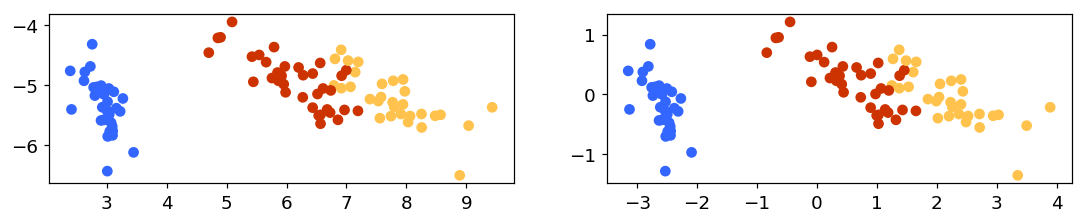

In [189]:
CLASS_1_C = r'#3366ff'
CLASS_2_C = r'#cc3300'
CLASS_3_C = r'#ffc34d'
colors = [CLASS_1_C, CLASS_2_C, CLASS_3_C]
colorsMap = [ colors[x - 1] for x in train_labels ]

# create PCA
pca = PCA(n_components=2)

# fit PCA model onto training set
pca.fit(train_set)

# transform training & test sets w/ fitted model
sciTfmTrain = pca.transform(train_set)
sciTfmTest = pca.transform(test_set)
for t in [sciTfmTrain, sciTfmTest]: t[:,1] *= -1

fig, ax = plt.subplots(1, 2)
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')

ax[0].scatter(tfmTrain[:,0], tfmTrain[:,1], c=colorsMap)
ax[1].scatter(sciTfmTrain[:,0], sciTfmTrain[:,1], c=colorsMap)

## 6. Compare with your selected features

### Scatter plots

Let's finally consider the two features you selected in lab 5. We want to compare the manually reduced dataset to the PCA-reduced one (use the dataset reduced with your own implementation).

To do this, we will first compare the two scatter plots. You should obtain something like this:

![](pca_comparison.png)

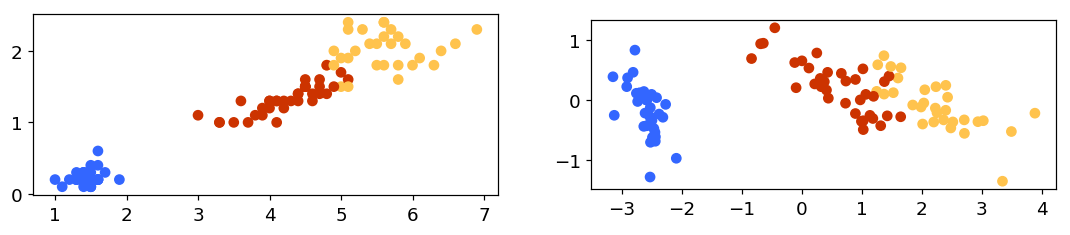

In [190]:
reduced_train_set = train_set[:,[2,3]]
reduced_test_set = test_set[:,[2,3]]

# write your code here
fig, ax = plt.subplots(1, 2)
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')

ax[0].scatter(reduced_train_set[:,0], reduced_train_set[:,1], c=colorsMap)
ax[1].scatter(sciTfmTrain[:,0], sciTfmTrain[:,1], c=colorsMap)

### Nearest-Centroid accuracy

By looking at the above plots, it seems like our manually reduced dataset separates the data in a better way. 


Let's prove this by running the Nearest-Centroid classifier you implemented in lab 5, and let's calculate the accuracy as we did in lab 6.

In [202]:
from collections import defaultdict

def count_classes(labels): return len(set(labels))

def calcCentroids(sample, labels):
    # class -> features
    classes = [ [] for i in range(count_classes(labels) + 1) ]
    for idx, x in enumerate(sample):
        cls = labels[idx]
        classes[cls - 1].append(x)
    
    # class -> centroid
    centroids = [ [] for i in range(count_classes(labels)) ]
    for idx, x in enumerate(classes):
        centroids[idx] = np.mean(x, axis=0)
    return centroids

# returns idx of closest (i.e. class)
def findClosestCentroid(point, centroids):
    dists = dict()
    for idx, x in enumerate(centroids):
        d = np.linalg.norm(point-x)
        dists[idx] = d
    closest = min(dists, key=dists.get)
    #print(dists, '=>', closest)
    return closest

# write your code here (remember to add the needed code from lab 5)
def nearestCentroid(sample, centroids):
    assignments = defaultdict(list)
    for idx, x in enumerate(sample):
        predicted = findClosestCentroid(x, centroids)
        ground = test_labels[idx]
        #print(x, '=>', predicted, '|', ground)
        assignments[predicted].append(x)
    return assignments

def labelsForSample(sample):
    centroids = calcCentroids(sample, test_labels)
    assignments = nearestCentroid(sample, centroids)
    labels = []
    for c in [0,1,2]:
        labels += [ c for x in assignments.get(c) ]
    return labels

def calculate_accuracy(gt_labels, pred_labels):
    correct = list(map(lambda x: int(x[0])==int(x[1]), zip(gt_labels, pred_labels))).count(True)
    return correct / len(gt_labels)

labelsForSample(reduced_test_set)
#d = nearestCentroid(reduced_test_set, calcCentroids(reduced_test_set, test_labels))
#calculate_accuracy(test_labels, d)
#print(d)
#calculate_accuracy(test_labels, nearestCentroid(sciTfmTrain, calcCentroids(sciTfmTrain, test_labels)))

IndexError: list assignment index out of range

### Discussion

Using features (3, 4) and our PCA-reduced dataset, we obtained the following results

```
Accuracy with manually selected features: 0.96
Accuracy with PCA: 0.88
```

In fact, as suspected before, the PCA results are slightly worse. This should not come to a big surprise.

PCA excels when dealing with high dimensionality data (e.g. 1024 or more dimensions). In our case, our simple Iris dataset contains 4 features only, and we already observed that, due to the simplicity of the dataset, by carefully selecting 2 features we can obtain nearly perfect results (i.e. 96% of test samples are correctly classified).

However, this is an ideal scenario. In real problems you will deal with far more complex and higher dimensional datasets, in which cases PCA will be helpful.